# 22L-7764
## Assignment 02 - Introduction to Data Science
**Datasets: Iris, Titanic, Housing<br><br>**
**Tasks: Preprocessing and Visualization** <br>
Question 1: Describing the data<br>
Question 2: Histogram/Boxplot<br>
Question 3: Handling Missing Values<br>
Question 4: Handling Outliers<br>


Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the data using pd.read_excel

In [2]:
iris_data = "D:/my-folder/Uni/bs data science/third semester/Intro to DS/datasets/iris.xlsx"
titanic_data = "D:/my-folder/Uni/bs data science/third semester/Intro to DS/datasets/titanic.xlsx"
housing_data = "D:/my-folder/Uni/bs data science/third semester/Intro to DS/datasets/housing.xlsx"


iris = pd.read_excel(iris_data, index_col = 0 )
titanic = pd.read_excel(titanic_data,index_col=0)
housing = pd.read_excel(housing_data)


## Question 01

In [3]:
def analyze_feature(feature):

    data_type = feature.dtype

    total_instances = feature.count()

    num_nulls = feature.isnull().sum()
    
    
    Q1 = feature.quantile(0.25) 
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    
    
    #formula to decide outlier as studied in MT2005
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # sum of all values that lie outside the upper and lower bounds
    num_outliers = ((feature < lower_bound) | (feature > upper_bound)).sum()

    min_value = feature.min()

    max_value = feature.max()

    mode_value = feature.mode().values[0] # .values[0] because output is a list of mode, dtype and column name

    mean_value = feature.mean()

    median_value = feature.median()

    variance_value = feature.var()

    std_deviation_value = feature.std()
    
    #returning a dictionary data type
    return {
        "Data Type": data_type,
        "Total Instances": total_instances,
        "Number of Nulls": num_nulls,
        "Number of Outliers": num_outliers,
        "Min Value": min_value,
        "Max Value": max_value,
        "Mode": mode_value,
        "Mean": mean_value,
        "Median": median_value,
        "Variance": variance_value,
        "Stdandard Deviation": std_deviation_value
    }

### Iris:

Using head function to peek at the data set

In [4]:
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Made a dictionary for analysis and excluded the y-label or ("ouput dimension") which was Species.<br> With a loop extracted description of each numerical column

In [5]:
iris_analysis= {} 
for column in iris.columns[:-1]:
    iris_analysis[column] = analyze_feature(iris[column])

In [6]:
iris_info=pd.DataFrame(iris_analysis).transpose()
display(iris_info) #converting dictionary in dataframe and transposing

,Data Type,Total Instances,Number of Nulls,Number of Outliers,Min Value,Max Value,Mode,Mean,Median,Variance,Stdandard Deviation
SepalLengthCm,float64,150,0,0,4.3,7.9,5.0,5.843333,5.8,0.685694,0.828066
SepalWidthCm,float64,150,0,4,2.0,4.4,3.0,3.054,3.0,0.188004,0.433594
PetalLengthCm,float64,150,0,0,1.0,6.9,1.5,3.758667,4.35,3.113179,1.76442
PetalWidthCm,float64,150,0,0,0.1,2.5,0.2,1.198667,1.3,0.582414,0.763161


### Titanic:

To peek at the dataset and make sure it is loaded properly

In [7]:
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Making a dataframe of the dictionary. It contains the description of only numerical values and the ordinally encoded columns<br> such as "Survived" have been excluded

In [8]:
titanic_analysis= {} 
for column in ["Age", "SibSp", "Parch", "Fare"]: 

    titanic_analysis[column] = analyze_feature(titanic[column]) 

titanic_info=pd.DataFrame(titanic_analysis).transpose()
display(titanic_info)

,Data Type,Total Instances,Number of Nulls,Number of Outliers,Min Value,Max Value,Mode,Mean,Median,Variance,Stdandard Deviation
Age,float64,714,177,11,0.42,80.0,24.0,29.699118,28.0,211.019125,14.526497
SibSp,int64,891,0,46,0,8,0,0.523008,0.0,1.216043,1.102743
Parch,int64,891,0,213,0,6,0,0.381594,0.0,0.649728,0.806057
Fare,float64,891,0,116,0.0,512.3292,8.05,32.204208,14.4542,2469.436846,49.693429


Analyzing number of deaths and survivals based on the port they embarked from and categorizing them further based on gender<br>
The data shows the description of age of 

In [34]:
not_survived_stats = titanic[titanic['Survived'] == 0].groupby(['Sex', 'Embarked']).count()
display(pd.DataFrame(not_survived_stats))

Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Embarked                                                            
female C                9       9     9    9      9      9       9     9   
       Q                9       9     9    9      9      9       9     9   
       S               63      63    63   63     63     63      63    63   
male   C               66      66    66   66     66     66      66    66   
       Q               38      38    38   38     38     38      38    38   
       S              364     364   364  364    364    364     364   364   

                 Cabin  
Sex    Embarked         
female C             1  
       Q             0  
       S             5  
male   C            16  
       Q             2  
       S            44

In [9]:
survived_stats = titanic[titanic['Survived'] == 1].groupby(['Sex', 'Embarked'])['Age'].describe()

not_survived_stats = titanic[titanic['Survived'] == 0].groupby(['Sex', 'Embarked'])['Age'].describe()

survived_stats = survived_stats.rename(columns={'mean': 'Mean Age', 'std': 'Std Deviation', 'max': 'Max Age', 'min': 'Min Age'})
not_survived_stats = not_survived_stats.rename(columns={'mean': 'Mean Age', 'std': 'Std Deviation', 'max': 'Max Age', 'min': 'Min Age'})
display(survived_stats,not_survived_stats)

count   Mean Age  Std Deviation  Min Age   25%   50%   75%  \
Sex    Embarked                                                               
female C          55.0  28.645455      15.735200     0.75  17.5  27.0  39.5   
       Q           7.0  21.571429       7.230886    15.00  16.0  19.0  26.0   
       S         133.0  28.996241      13.523338     1.00  21.0  29.0  36.0   
male   C          24.0  29.725833      15.356874     0.42  21.5  26.5  37.0   
       Q           1.0  29.000000            NaN    29.00  29.0  29.0  29.0   
       S          68.0  26.386029      17.032252     0.67  10.5  28.0  36.0   

                 Max Age  
Sex    Embarked           
female C            60.0  
       Q            33.0  
       S            63.0  
male   C            60.0  
       Q            29.0  
       S            80.0

count   Mean Age  Std Deviation  Min Age     25%    50%  \
Sex    Embarked                                                            
female C           6.0  25.583333      17.333253      9.0  15.125  17.50   
       Q           5.0  28.100000       8.546929     18.0  21.000  30.50   
       S          53.0  24.698113      13.752741      2.0  16.000  25.00   
male   C          45.0  34.744444      14.529993     11.0  25.000  30.00   
       Q          15.0  31.066667      21.857384      2.0  13.500  31.00   
       S         300.0  31.176667      13.494411      1.0  21.000  28.25   

                   75%  Max Age  
Sex    Embarked                  
female C         38.25     50.0  
       Q         32.00     39.0  
       S         31.00     57.0  
male   C         40.00     71.0  
       Q         42.25     70.5  
       S         39.00     74.0

### Housing:

In [10]:
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
housing_analysis= {} 
for column in ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]: 

    housing_analysis[column] = analyze_feature(housing[column]) 

housing_info=pd.DataFrame(housing_analysis).transpose()
display(housing_info) 

,Data Type,Total Instances,Number of Nulls,Number of Outliers,Min Value,Max Value,Mode,Mean,Median,Variance,Stdandard Deviation
price,int64,545,0,15,1750000,13300000,3500000,4766729.247706,4340000.0,3498544355820.57959,1870439.615657
area,int64,545,0,12,1650,16200,6000,5150.541284,4600.0,4709512.057576,2170.141023
bedrooms,int64,545,0,12,1,6,3,2.965138,3.0,0.544738,0.738064
bathrooms,int64,545,0,1,1,4,1,1.286239,1.0,0.252476,0.50247
stories,int64,545,0,41,1,4,2,1.805505,2.0,0.752543,0.867492
parking,int64,545,0,12,0,3,0,0.693578,0.0,0.74233,0.861586


## Question 02

In [12]:
def plot_histogram(dataset, column_name):
    if column_name not in dataset.columns:
        print(f"Column '{column_name}' not found in the dataset.")
        return

    column_data = dataset[column_name]

    plt.hist(column_data, bins=10, color="cornflowerblue", edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)

### Iris:

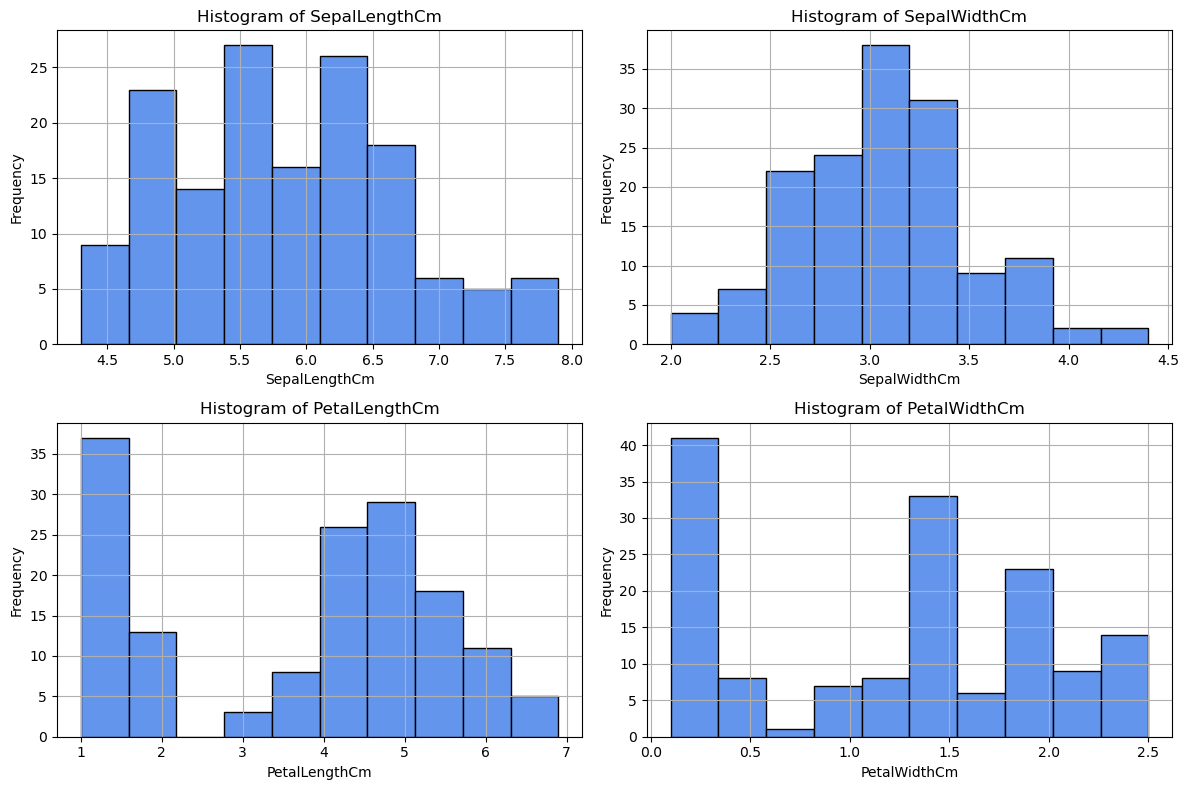

In [13]:
plt.figure(figsize=(12, 8))

dimensions = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i, dimension in enumerate(dimensions):
    plt.subplot(2, 2, i + 1)
    plot_histogram(iris, dimension)

plt.tight_layout()
plt.show()

### Titanic:

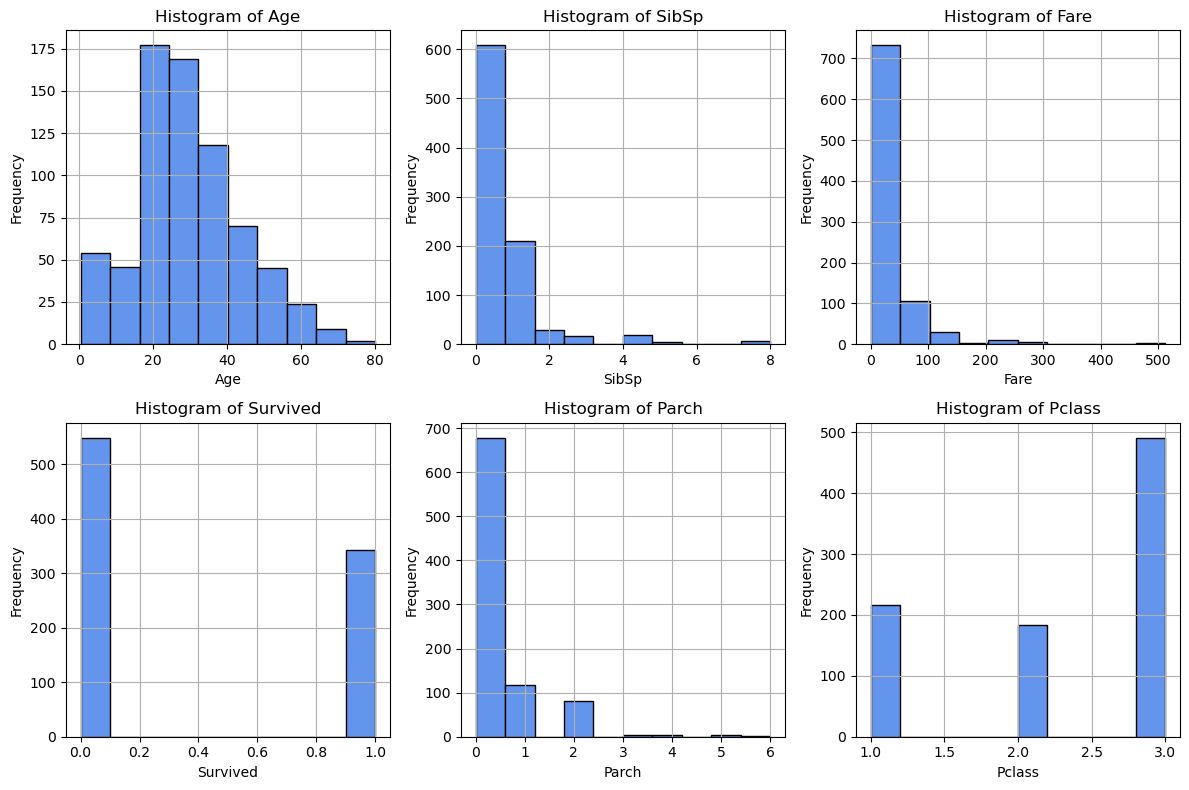

In [14]:
plt.figure(figsize=(12, 8))

dimensions = [ 'Age','SibSp','Fare','Survived','Parch','Pclass']
for i, dimension in enumerate(dimensions):
    plt.subplot(2, 3, i + 1)
    plot_histogram(titanic, dimension)

plt.tight_layout()
plt.show()

### Housing:

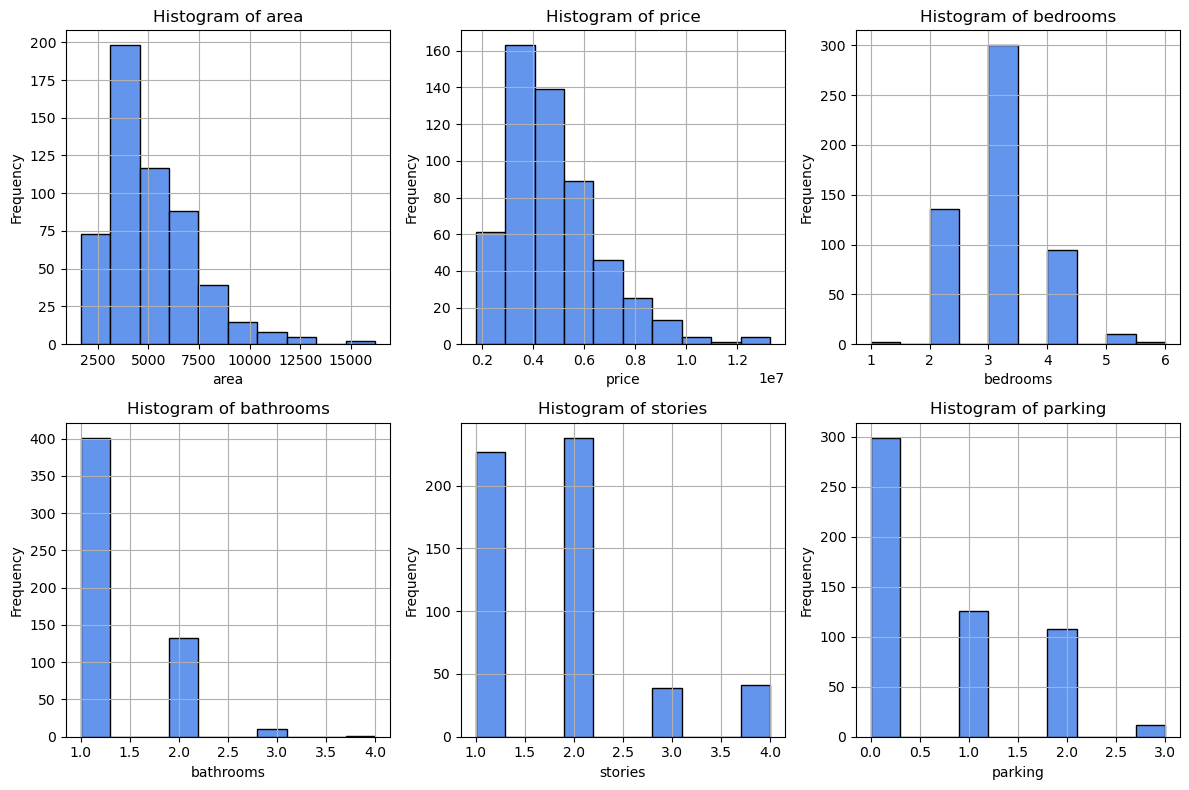

In [15]:
plt.figure(figsize=(12, 8))

dimensions = ['area', 'price', 'bedrooms', 'bathrooms','stories', 'parking']
for i, dimension in enumerate(dimensions):
    plt.subplot(2, 3, i + 1)
    plot_histogram(housing, dimension)

plt.tight_layout()
plt.show()

## Question 03

### Iris:
This dataset has no missing values. The count of NaN values is zero.

In [16]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Titanic 
This dataset has 177 missing values in column 'Age' <br><br>
We will impute it with the mean value of ages<br>
This will be preventing data loss and maintaining statistical properties critical for model training.<br>
Imputing missing values with the mean will help to provide complete data for training machine learning models. <br> <br>
If we were to predict the death toll per age group then the results would be misleading as the model would get underfit<br> because the null values for age are 117 out of 891

In [17]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
titanic_df = titanic
mean_value=titanic_df['Age'].mean()
titanic_df['Age'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(titanic_df.isnull().sum())
display(titanic_df.tail(-888))

Updated Dataframe:
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


### Housing
Housing dataset has no missing values

In [19]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Question 04

In [20]:
def get_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound
import pandas as pd
import numpy as np

def has_outliers(column, lower_bound, upper_bound):
    is_outlier = (column < lower_bound) | (column > upper_bound)
    return is_outlier.any()


def winsorize(data, column_name, lower_bound, upper_bound):

    data_copy = data.copy()

    data_copy[column_name] = np.where(data_copy[column_name] < lower_bound, lower_bound, data_copy[column_name])

    data_copy[column_name] = np.where(data_copy[column_name] > upper_bound, upper_bound, data_copy[column_name])

    return data_copy

import pandas as pd
import numpy as np

def replace_with_mode(data, column_name, lower_threshold=5, upper_threshold=95):
   
    data_copy = data.copy()
    mode_value = data_copy[column_name].mode().iloc[0]
    data_copy[column_name] = data_copy[column_name].apply(lambda x: mode_value if x < lower_threshold or x > upper_threshold else x)

    return data_copy


### Iris:
- We will replace the value of outlier width with the nearest value of limit bound.<br><br>
This approach ensures that the outliers are replaced with values that are within the bounds, effectively trimming or winsorizing the extreme values.<br> It's a useful technique to mitigate the impact of outliers while preserving the overall distribution of the data.

In [21]:
iris_info["Number of Outliers"]

SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
Name: Number of Outliers, dtype: object

In [22]:
lower_bound, upper_bound = get_bounds(iris['SepalWidthCm'])
iris_df = winsorize(iris, "SepalWidthCm", lower_bound, upper_bound)
has_outliers(iris_df["SepalWidthCm"], lower_bound, upper_bound)

False

### Titanic:

- I will not replace the outliers of Age with nearest limit because it might be used to predict on the basis of age groups<br>
- I will not replace the SibSp outlier with the mode value because as this is the number of siblings a passenger had onboard<br>
- I will replace the Parch value with the mode value as this is the number of parents (1 or 2) a passenger had onboard<br>
- We will replace the Fare value with the nearest limit bond<br>


In [23]:
titanic_info["Number of Outliers"]

Age       11
SibSp     46
Parch    213
Fare     116
Name: Number of Outliers, dtype: object

In [24]:

lower_bound, upper_bound = get_bounds(titanic['Fare']) #find limits
titanic_df = winsorize(titanic, "Fare", lower_bound, upper_bound) #trim
print(has_outliers(titanic_df["Fare"], lower_bound, upper_bound)) #check if value is replaced
titanic_df = replace_with_mode(titanic, "SibSp", lower_bound, upper_bound)
print(has_outliers(titanic_df["SibSp"], lower_bound, upper_bound))
titanic_df = replace_with_mode(titanic, "Parch", lower_bound, upper_bound)
print(has_outliers(titanic_df["Parch"], lower_bound, upper_bound))

False
False
False


### Housing:

- I will only drop the top 2% of the prices and relevant features<br>
- This will ensure that prices are not very high<br>
I will remove the instance of outlier of bathroom only<br>


In [25]:
housing_info["Number of Outliers"]

price        15
area         12
bedrooms     12
bathrooms     1
stories      41
parking      12
Name: Number of Outliers, dtype: object

In [26]:
housing_df = housing.copy()
lower_bound, upper_bound = get_bounds(housing['bathrooms'])
housing_df = housing_df[(housing_df["bathrooms"] >= lower_bound) & (housing_df["bathrooms"] <= upper_bound)]

In [27]:
# Calculate the 98th percentile for each column
price_percentile = housing_df['price'].quantile(0.98)
area_percentile = housing_df['area'].quantile(0.98)

# Filter the DataFrame to exclude values above the 99th percentile
housing_df = housing_df[
    (housing_df['price'] <= price_percentile) &
    (housing_df['area'] <= area_percentile) 
]
